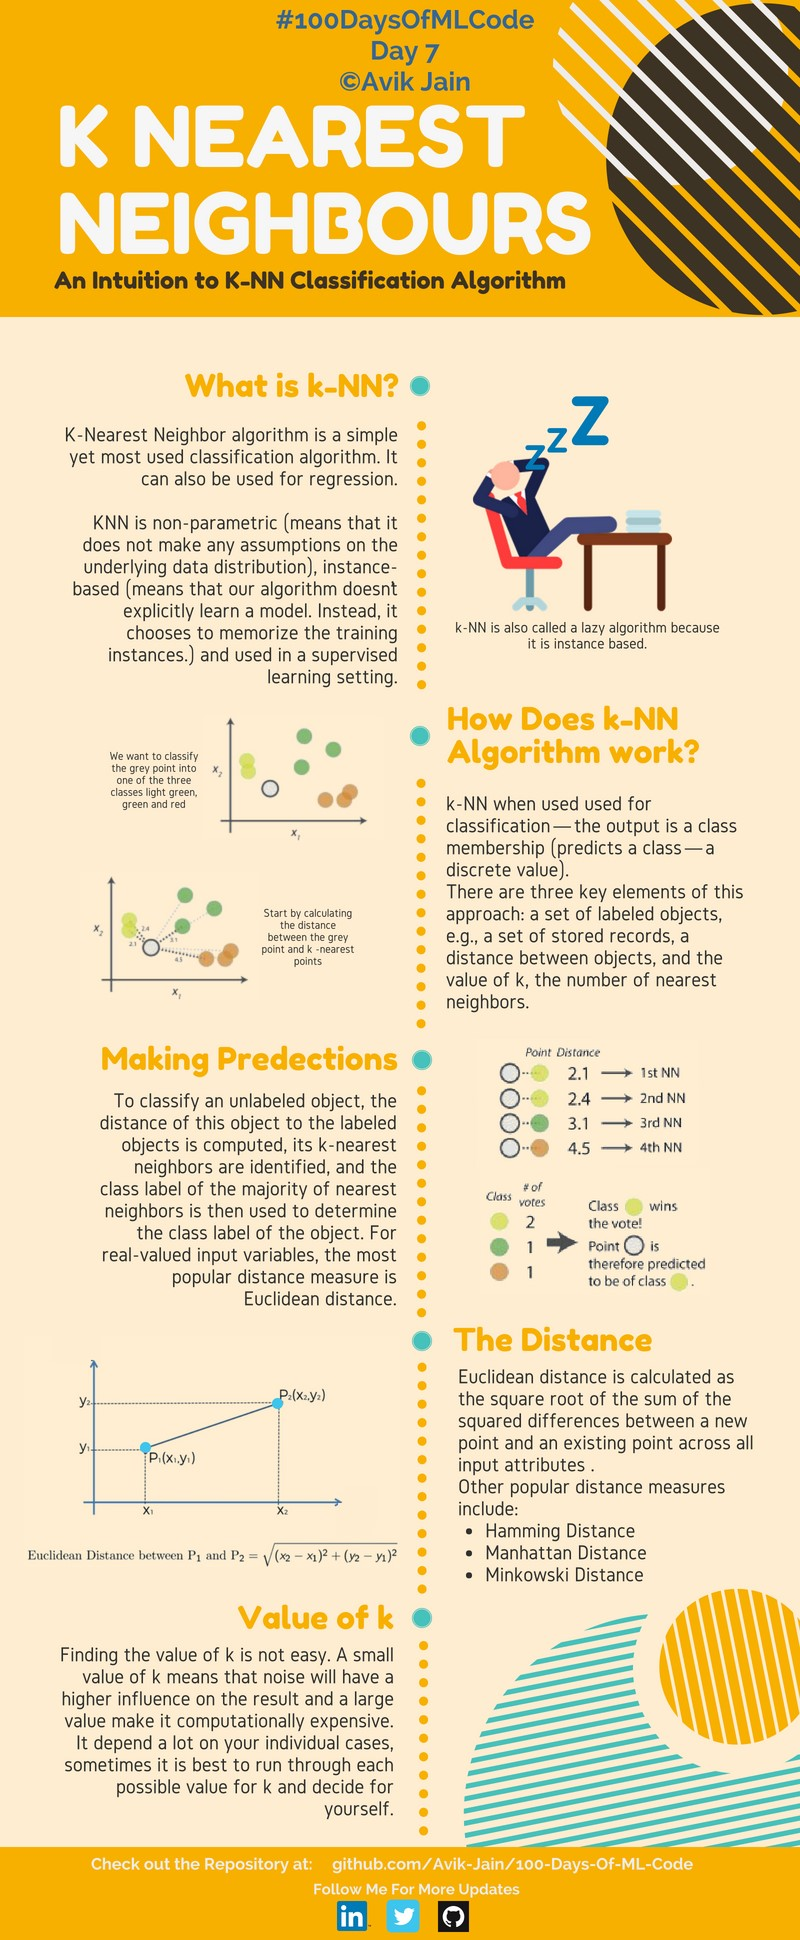

Predict if a person will have diabetes or not using KNN ALGORITHM

In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix

In [109]:
data=pd.read_csv(r"C:\50-ML-Challenge-\dataset\KNN_Dataset.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [110]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [111]:
zero_not_accepted=["Glucose","BloodPressure","Insulin","BMI","SkinThickness"]

In [112]:
for column in zero_not_accepted:
  data[column]=data[column].replace(0,np.nan)
  mean=int(data[column].mean(skipna=True))
  data[column]=data[column].replace(np.nan,mean)

In [113]:
#split data
x=data.iloc[:,:8]
y=data.iloc[:,8]
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)


In [114]:
#Normailze
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)  
xtest  = scaler.transform(xtest)       

In [122]:
model=KNeighborsClassifier(n_neighbors=5,p=2,metric="euclidean")
model.fit(xtrain,ytrain)

KNeighborsClassifier(metric='euclidean')

In [123]:
ypred=model.predict(xtest)

In [124]:
print("Accuracy:", accuracy_score(ytest, ypred)*100,"%")
print("\nConfusion Matrix:\n", confusion_matrix(ytest, ypred))
print("\nF1_SCORE:\n", f1_score(ytest, ypred)*100)

Accuracy: 74.02597402597402 %

Confusion Matrix:
 [[74 25]
 [15 40]]

F1_SCORE:
 66.66666666666666


In [125]:
tn, fp, fn, tp = confusion_matrix(ytest, ypred).ravel()

print("TN:", tn)
print("FP:", fp)
print("FN:", fn)
print("TP:", tp)

TN: 74
FP: 25
FN: 15
TP: 40
